In [1]:
pip install prettytable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Varsha\\Desktop\\symptoms.xlsx')

print (df)
def changeYesNo(string):
    for d in df.index:
        if df.loc[d, string] == 'Yes':
            df.loc[d, string] = 1
        else:
            df.loc[d, string] = 0



changeYesNo('SmallLump')
changeYesNo('ChangesinSizeShape')
changeYesNo('SkinChanges')
changeYesNo('NippleChanges')
changeYesNo('LumpinUnderarm')
changeYesNo('Swelling')
changeYesNo('LargeLumpMass')
changeYesNo('BonePain')
changeYesNo('Cough')
changeYesNo('AbdominalPain')
changeYesNo('Headaches')
changeYesNo('WeightLossFatigue')
print(df)

feature_cols = ['SmallLump', 'ChangesinSizeShape', 'SkinChanges', 'NippleChanges',
                 'LumpinUnderarm', 'Swelling', 'LargeLumpMass', 'BonePain',
                 'Cough', 'AbdominalPain', 'Headaches', 'WeightLossFatigue']
X = df[feature_cols]
Y = df['Stage']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
 shuffle=False)

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from joblib import dump, load

# Saving the model


clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Expected Output  Predicted Output")
for d in range(len(y_test)):
    print(y_test.iloc[d], y_pred[d])




from joblib import dump, load
dump(clf, 'decisiontree.joblib')
clf = load('decisiontree.joblib')


from prettytable import PrettyTable
t = PrettyTable(['Expected Output', 'Predicted Output'])
for d in range(len(y_test)):
    t.add_row([y_test.iloc[d], y_pred[d]])
print(t)




from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree




      Stage SmallLump ChangesinSizeShape SkinChanges NippleChanges  \
0   Stage 1       Yes                 No         Yes           Yes   
1   Stage 2       Yes                Yes          No            No   
2   Stage 3       Yes                Yes         Yes           Yes   
3   Stage 4        No                 No          No            No   
4   Stage 2       Yes                 No         Yes            No   
..      ...       ...                ...         ...           ...   
64  Stage 3       Yes                Yes         Yes            No   
65  Stage 1       Yes                 No         Yes           Yes   
66  Stage 2       Yes                Yes          No            No   
67  Stage 4        No                 No          No            No   
68  Stage 3       Yes                Yes         Yes            No   

   LumpinUnderarm Swelling LargeLumpMass BonePain Cough AbdominalPain  \
0              No       No            No       No    No            No   
1            

In [15]:
pip install matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\varsha\appdata\local\programs\python\python311\lib\site-packages (3.8.2)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=feature_cols)
print(tree_rules)

|--- Swelling <= 0.50
|   |--- BonePain <= 0.50
|   |   |--- SkinChanges <= 0.50
|   |   |   |--- class: Stage 2
|   |   |--- SkinChanges >  0.50
|   |   |   |--- NippleChanges <= 0.50
|   |   |   |   |--- ChangesinSizeShape <= 0.50
|   |   |   |   |   |--- LumpinUnderarm <= 0.50
|   |   |   |   |   |   |--- class: Stage 2
|   |   |   |   |   |--- LumpinUnderarm >  0.50
|   |   |   |   |   |   |--- class: Stage 1
|   |   |   |   |--- ChangesinSizeShape >  0.50
|   |   |   |   |   |--- class: Stage 1
|   |   |   |--- NippleChanges >  0.50
|   |   |   |   |--- class: Stage 1
|   |--- BonePain >  0.50
|   |   |--- class: Stage 4
|--- Swelling >  0.50
|   |--- class: Stage 3



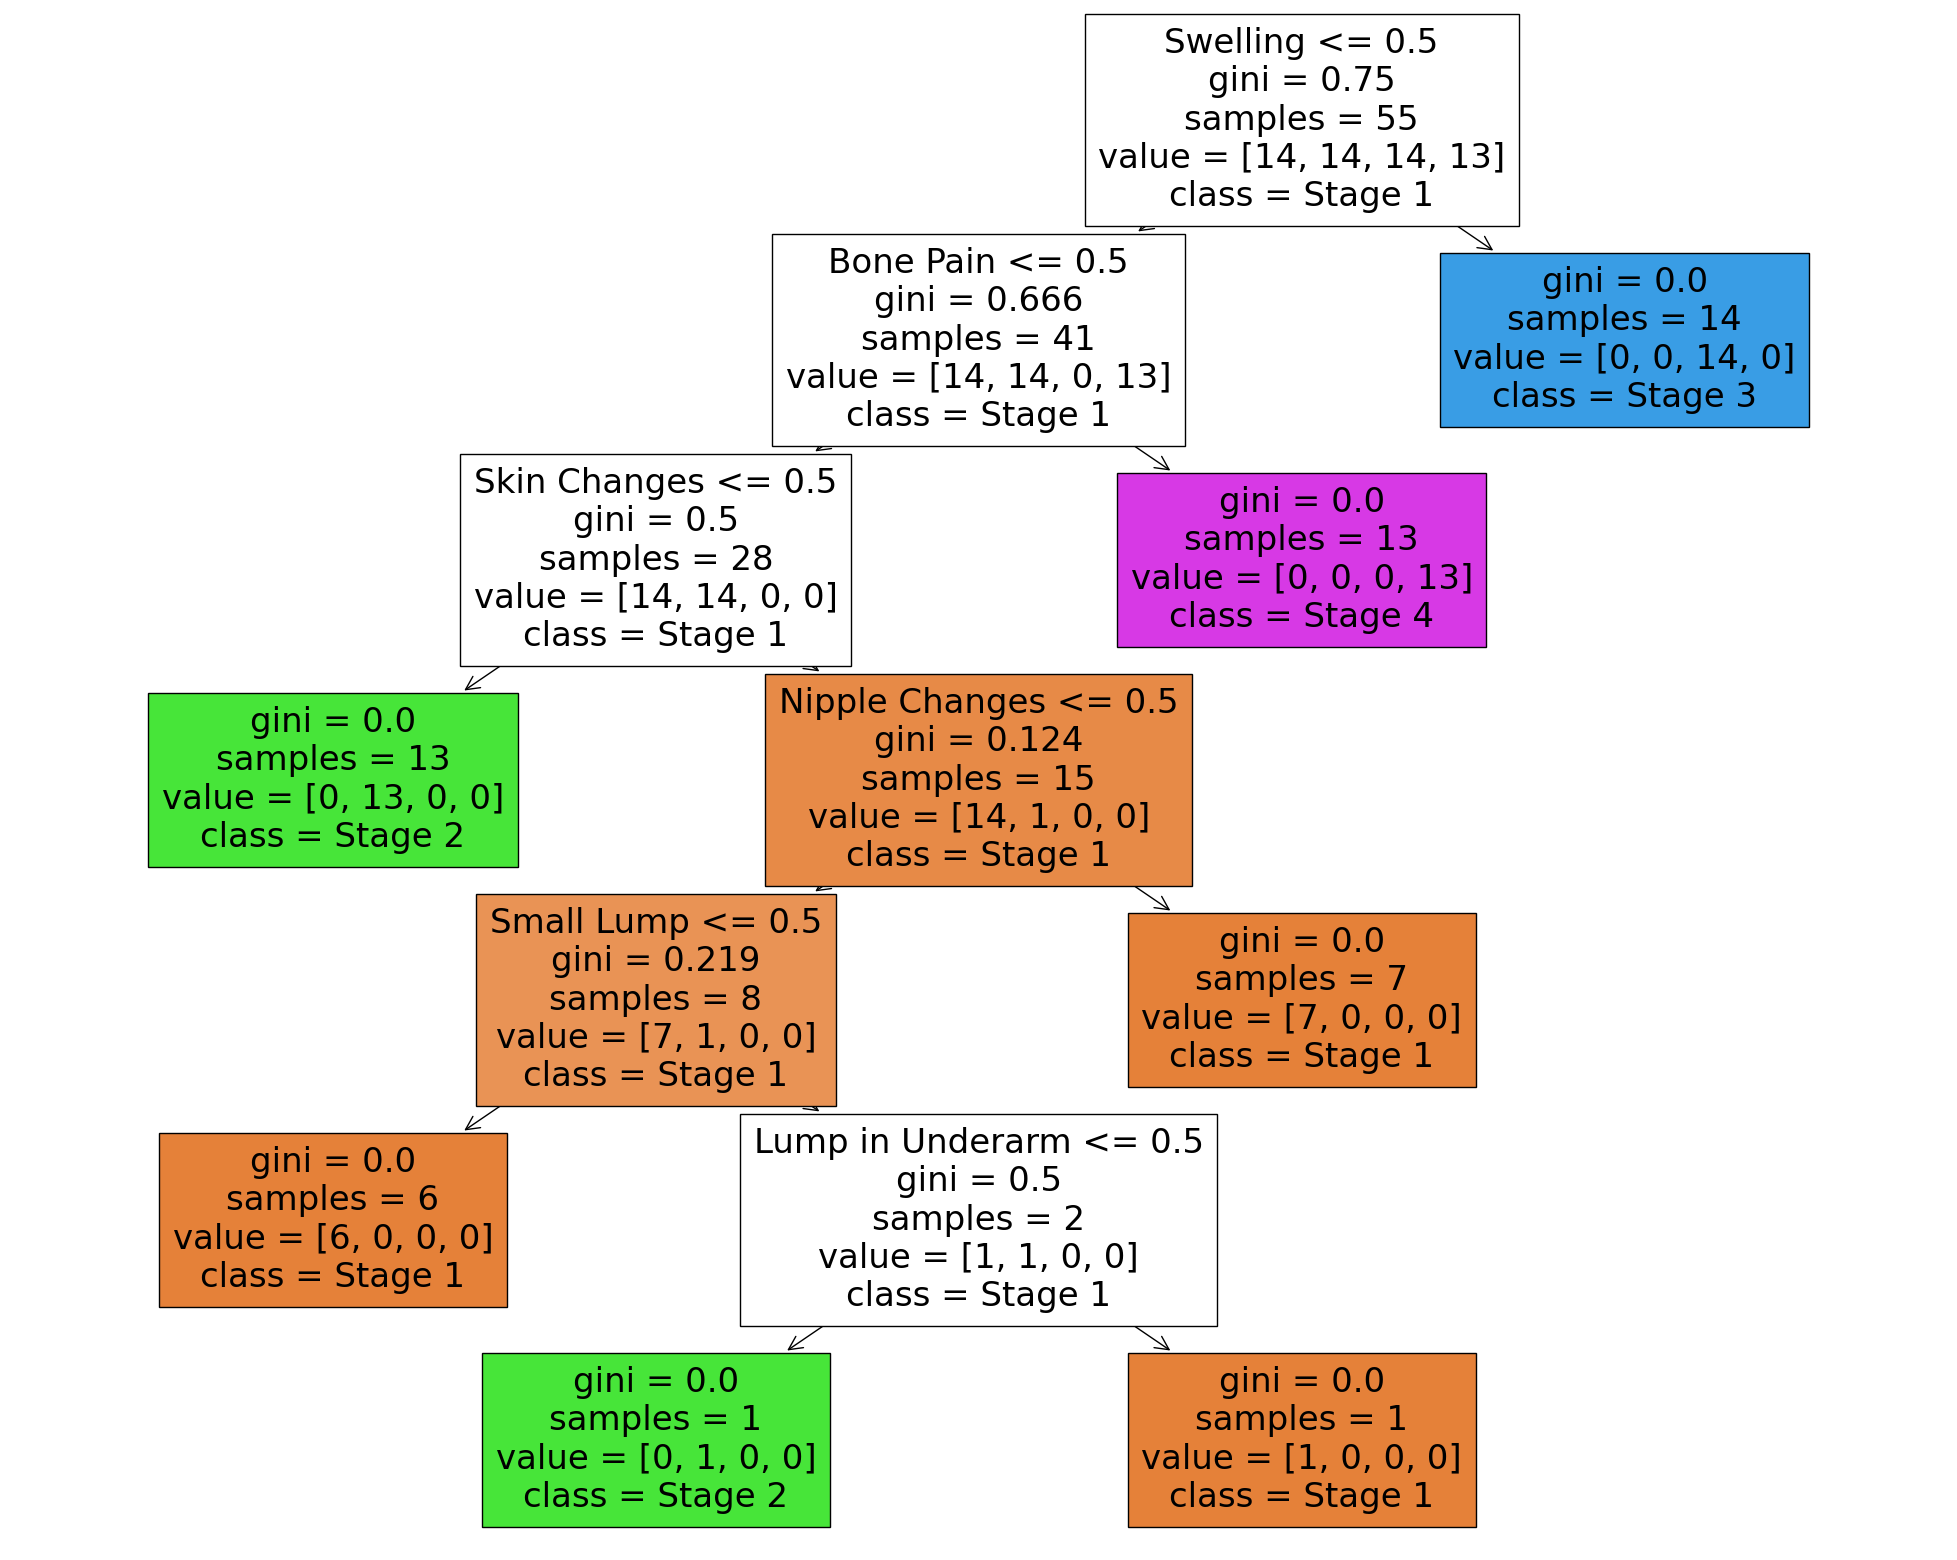

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Stage'] = le.fit_transform(df['Stage'])
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, feature_names=feature_cols, class_names=list(le.classes_), filled=True)


In [7]:
dump(clf, 'decisiontree.joblib')

['decisiontree.joblib']